# Sentiment Analysis

####  In this analysis, we create a machine learning model that will predict whether a movie review is positive or negative. This is a binary text classification.<br>Our goal is to find which machine learning model is best suited to predict sentiment(output) given a movie review(input)

## Preparing the data

### Reading the dataset

In [1]:
import pandas as pd
df_review = pd.read_csv('datasets/IMDB Dataset.csv')
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


#### This dataset contains 50000 rows, however to train our model faster, we take a smaller sample of 10000 rows.This small sample will contain 9000 positive and 1000 negative reviews to make the data imbalanced. 

In [2]:
df_positive = df_review[df_review['sentiment']=='positive'][:9000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]
df_review_imb = pd.concat([df_positive,df_negative])

### Dealing with Imbalanced Classes

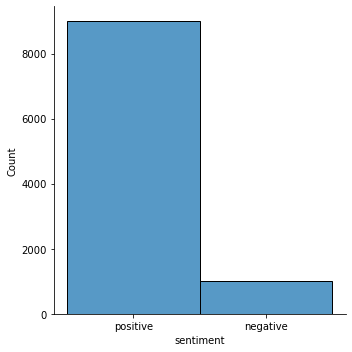

In [8]:
import seaborn as sns
sns.displot(df_review_imb['sentiment'])

#### To resample our data, we use the imblearn library. We can either undersample positive reviews or oversample negative reviews. In this case, we use RandomUnderSampler

In [10]:
pip install imblearn

In [11]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0) #First, we create a new instance, random_state=0 to control randomization of algorithm.
df_review_bal, df_review_bal['sentiment'] = rus.fit_resample(df_review_imb[['review']],df_review_imb['sentiment'])
#fit_sample(x,y)-where 'x' contains the data which have to be sampled and 'y' contains labels for ech sample 'x'.

df_review_bal # balanced dataset

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


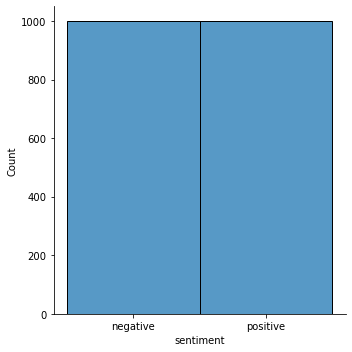

In [13]:
sns.displot(df_review_bal['sentiment'])

In [14]:
print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))

# Now, the dataset is equally distributed.

sentiment
positive    9000
negative    1000
dtype: int64
sentiment
negative    1000
positive    1000
dtype: int64


In [15]:
df_review_bal.isnull().sum()

review       0
sentiment    0
dtype: int64

### Splitting into training and testing splits

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_review_bal, test_size=0.33, random_state = 42)

In [17]:
train_x, train_y = train['review'],train['sentiment']
test_x, test_y = test['review'], test['sentiment']

# train_x: independent variables used to train model(67%).
# train_y: dependent variables/target variables need to be predicted.
# test_x: remaining 33% independent variables used to make predictions to test accuracy of model.
# test_y: category labels used to test the accuracy between actual and predicted categories.

## Text Representation(Bag of words)

#### Classifiers and learning algorithm expect numerical feature vectors rather than raw text documents. So, we convert text into numerical vectors. There are many text representation techniques like one-hot encoding, bag of words, word2vec, etc.,<br><br> Since, we care about the frequency of words in text reviews and order of words is irrelevant.<br><li>CountVectorizer <li>Term Frequency, Inverse Document Frequency.

### CountVectorizer

#### CountVectorizer gives us the frequency of occurence of words in document.

### TF-IDF

#### It computes weights that represent how important a word is to the document in collection of documents. TF-IDF value increases proportionally to number of times a word appears in document.

### Turning text data into numerical vectors

### Now, we have to identify unique words for positive and negative reviews, so we choose TF-IDF.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

# We created a new instance of TfidfVectorizer and removed English stopwords and the fit(find the parameters of the model) and transform train_x

<1340x20625 sparse matrix of type '<class 'numpy.float64'>'
	with 118834 stored elements in Compressed Sparse Row format>

In [20]:
train_x_vector.shape
# Sparse matrix with 1340 reviews and 20625 words

(1340, 20625)

In [21]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector, index = train_x.index, columns = tfidf.get_feature_names())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042791,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
test_x_vector = tfidf.transform(test_x)

####  Now, we prepare the text data in order to develop better models by using tokenization and removing extra words we consider irrelevant apart from stopword list CountVectorizer and Tfidf have by default.

## Model Selection

### SVM (Support Vector Machines)

In [23]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [24]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [26]:
print(dec_tree.predict(tfidf.transform(['A good movie'])))
print(dec_tree.predict(tfidf.transform(['An excellent movie'])))
print(dec_tree.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['positive']


### Naive Baiyes

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(),train_y)

GaussianNB()

In [41]:
print(gnb.predict(tfidf.transform(['A good movie']).toarray()))
print(gnb.predict(tfidf.transform(['An excellent movie']).toarray()))
print(gnb.predict(tfidf.transform(['I did not like this movie at all']).toarray()))

['negative']
['negative']
['negative']


### Logistic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

In [33]:
print(log_reg.predict(tfidf.transform(['A good movie'])))
print(log_reg.predict(tfidf.transform(['An excellent movie'])))
print(log_reg.predict(tfidf.transform(['I did not like this movie at all'])))

['negative']
['positive']
['negative']


### Model Evaluation

In [45]:
print("SVM score: {}".format(svc.score(test_x_vector,test_y))) # SVM Score
print("Decision Tree score: {}".format(dec_tree.score(test_x_vector,test_y))) # Decision Tree Score
print("Logistic Regression score: {}".format(log_reg.score(test_x_vector,test_y)))  # Logistic Regression Score
print("Naive Bayes score: {}".format(gnb.score(test_x_vector.toarray(),test_y))) # Naive Bayes Score

# SVM Score is highest

SVM score: 0.8409090909090909
Decision Tree score: 0.6621212121212121
Logistic Regression score: 0.8303030303030303
Naive Bayes score: 0.6348484848484849


### F1 Score

#### F1 score is weighted average of precision and recall. Accuracy is used when true positives and true negatives  are important while F1 score is used when the false negatives and false positives are crucial. Also, F1 takes into account how data is distributed

In [47]:
from sklearn.metrics import f1_score
f1_score(test_y, svc.predict(test_x_vector), labels=['positive','negative'], average=None)

# Positive Labels: 0.84 Negative Labels: 0.83

array([0.84671533, 0.83464567])

### Classification Report

In [49]:
from sklearn.metrics import classification_report
print(classification_report(test_y, svc.predict(test_x_vector), labels=['positive','negative']))

# Accuracy and f1-score are the same.

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



### Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_y, svc.predict(test_x_vector), labels=['positive','negative'])
conf_mat

array([[290,  45],
       [ 60, 265]], dtype=int64)

## Tuning the model

### GridSearchCV

#### Technique consists of an exhaustive search on specified parameters in order to obtain the optimum values of hyperparameters.

In [53]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [1,4,8,16,32], 'kernel': ['linear','rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, parameters, cv = 5)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [54]:
print(svc_grid.best_params_)

{'C': 1, 'kernel': 'linear'}


In [55]:
print(svc_grid.best_estimator_)

SVC(C=1, kernel='linear')
